In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [342]:
df = pd.read_csv('mushrooms.csv')

In [343]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [344]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [345]:
def check_constraints(row):
    # Class and Odor constraint: If odor is 'pungent' (p), class is 'poisonous' (p)
    if row['odor'] == 'p' and row['class'] == 'e':
        return -1

    # If odor is 'foul' (f), class is 'poisonous' (p)
    if row['odor'] == 'f' and row['class'] == 'e':
        return -1

    # If odor is 'fishy' (y), class is 'poisonous' (p)
    if row['odor'] == 'y' and row['class'] == 'e':
        return -1
        
    # if odor is almond (a), class is edible (e)
    if row['odor'] == 'a' and row['class'] == 'p':
        return -1

    # if odor is anise (l), class is edible (e)
    if row['odor'] == 'l' and row['class'] == 'p':
        return -1

    # stalk constraint: if stalk-root is equal (e), veil-color is white (w)
    if row['stalk-root'] == 'e' and row['veil-color'] != 'w':
        return -1

    # Bruises and Stalk Surface constraint: If bruises is 't' (bruises present), stalk-surface-above-ring should be 'smooth' (s) and fibrous (f)
    if row['bruises'] == 't':
        if row['stalk-surface-above-ring'] != 's' and row['stalk-surface-above-ring'] != 'f':
            return -1

    # Stalk constraint: If stalk-color-below-ring is yellow (y) then class is 'poisonous' (p)
    if row['stalk-color-below-ring'] == ['y'] and row['class'] == 'e':
        return -1

    # Ring constraint: If ring numner is null (n) then class is 'poisonous' (p)
    if row['ring-number'] == ['n'] and row['class'] == 'e':
        return -1

    # Veil-color constraint: If veil-color is yellow (y) then class is 'poisonous' (p)
    if row['veil-color'] == ['y'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris green (r) then class is 'poisonous' (p)
    if row['spore-print-color'] == ['r'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris buff (b) then class is edible (e)
    if row['spore-print-color'] == ['b'] and row['class'] == 'p':
        return -1
        
    # Gill color constraint: If gill-color is 'green' (r), then class is 'poisonous' (p)
    if row['gill-color'] == 'r' and row['class'] == 'e':
        return -1

    # If all constraints are satisfied, return 1
    return 1

In [346]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,valid


In [347]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 1% of the rows
df_mutated = df.copy()
num_mutations = int(0.01 * len(df))  # Mutate 1% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding random values
df_mutated.loc[mutation_indices, 'class'] = 'e'
odor_categories = ['p',]  # Replace with actual categories
df_mutated.loc[mutation_indices, 'odor'] = np.random.choice(odor_categories, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


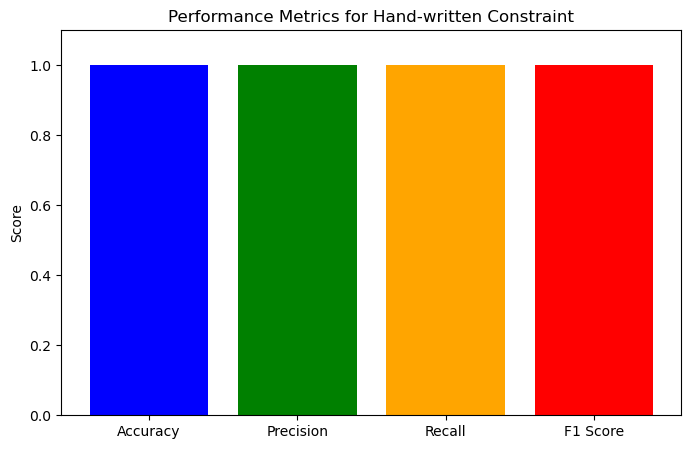

In [348]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


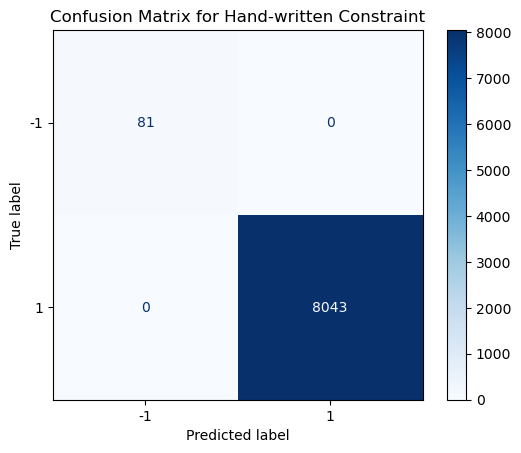

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()